# Installation guide
### First install chromedriver from this awful looking website 
https://sites.google.com/a/chromium.org/chromedriver/downloads
<br>(and don't forget where you put it, you'll need that path in a minute)

## Package Installation
### If you're using conda for package management

In [7]:
# Install conda packages in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} bs4 selenium pandas requests pillow


Solving environment: ...working... done

# All requested packages already installed.



### If you're using pip for package management

In [ ]:
# Install pip packages in the current Jupyter kernel
import sys
!{sys.executable} -m pip install bs4 selenium pandas requests pillow

## Now, let's get <i> coding
    For the rest of this exercise we'll be expecting you to chop and change things in the below code

### Load relevant packages

In [92]:
from selenium import webdriver
import pandas as pd
import os
from PIL import Image
from bs4 import BeautifulSoup
import re
import time
import random

### Find Chromedriver

In [69]:
ADAMS_CHROMEDRIVER_PATH='C:\\Users\\adamj\\Documents\\Coding\\chromedriver.exe'
#Insert your Chrome path into the quotes below
#MY_CHROMEDRIVER_PATH= ''
AdamDriver=webdriver.Chrome(ADAMS_CHROMEDRIVER_PATH)
#MyVeryFirstWebdriver = webdriver.Chrome(MY_CHROMEDRIVER_PATH)

a chrome window should then open automatically

### Define the url of the webpage you want to scrape 
I've put in an example that you can run to see it work, then you change the input

In [13]:
Adam_url='https://inception.davepedu.com/'
my_url=''

### Naviagate to the url using the GET command in Selenium

In [24]:
AdamDriver.get(url)
#MyVeryFirstWebDriver.get(url)

And the webpage will magically appear before your eyes <br>
![WOW](https://media3.giphy.com/media/oYtVHSxngR3lC/giphy.gif?cid=ecf05e473jb7qe0bwststqy9481kuils2ia5xw84uutcj6i3&rid=giphy.gif)

### Inspect the webpage

1. Right click the element you want on the webpage (to click on, to retrieve data from, etc)
2. Select 'Inspect'
3. Right click the highlighted html text
4. Select 'Copy -> Copy XPath'

![Inspection Time](https://tse4.mm.bing.net/th?id=OIP.twb1X6hfswtm4qAB8irEbwHaEC&pid=Api)

### How to use Selenium to click on an element

In [26]:
#Copy the XPath of whatever you want to click on here
Adam_button_xpath='/html/body/div[1]/img' 
my_button_xpath=''

#Replace this with your webdriver
element = AdamDriver.find_element_by_xpath(Adam_button_xpath)
#element=MyVeryFirstWebdriver.findfind_element_by_xpath(my_button_xpath)

element.click()

Watch as the button is clicked like magic, and imagine all the tasks you're going to be able to automate <br>
![Automation](https://media3.giphy.com/media/qYTn6z4fjSqXK/giphy.gif?cid=ecf05e47ih5ap5d1ng2qczq8i3evkxj95roneuufnrp2chpf&rid=giphy.gif)

Now go back up and change the code above if you haven't and then...

### Let's try another task

In [30]:
new_url='http://allselenium.info/python-selenium-commands-cheat-sheet-frequently-used/'
#Again, replace this with the name of your webdriver, I'm gonna hold your hand slightly less from here on in.
AdamDriver.get(new_url)

Now let's extract the useful information from this site

<html lang="en-US" xmlns:fb="https://www.facebook.com/2008/fbml" xmlns:addthis="https://www.addthis.com/help/api-spec" class="has-offscreen"><head><script type="text/javascript" src="//www.reddit.com/api/info.json?url=https%3A%2F%2Fallselenium.info%2Fpython-selenium-commands-cheat-sheet-frequently-used%2F&amp;jsonp=_ate.cbs.rcb_g5qf0"></script><script type="text/javascript" src="//www.reddit.com/api/info.json?url=http%3A%2F%2Fallselenium.info%2Fpython-selenium-commands-cheat-sheet-frequently-used%2F&amp;jsonp=_ate.cbs.rcb_4de10"></script><script type="text/javascript" src="https://m.addthis.com/live/red_lojson/300lo.json?si=5fa53fc31f661e34&amp;bkl=0&amp;bl=1&amp;pdt=2279&amp;sid=5fa53fc31f661e34&amp;pub=ra-5d446bd6784090c9&amp;rev=v8.28.8-wp&amp;ln=en&amp;pc=wpp&amp;cb=0&amp;ab=-&amp;dp=allselenium.info&amp;fp=python-selenium-commands-cheat-sheet-frequently-used%2F&amp;fr=&amp;of=0&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=0&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=1
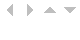

In [42]:
#Get the page source
html=AdamDriver.page_source
print(html)

Not looking the prettiest, hard to pick things apart... Let's make it look nicer using <b>Beautiful Soup</b>

<html class="has-offscreen" lang="en-US" xmlns:addthis="https://www.addthis.com/help/api-spec" xmlns:fb="https://www.facebook.com/2008/fbml">
 <head>
  <script src="//www.reddit.com/api/info.json?url=https%3A%2F%2Fallselenium.info%2Fpython-selenium-commands-cheat-sheet-frequently-used%2F&amp;jsonp=_ate.cbs.rcb_g5qf0" type="text/javascript">
  </script>
  <script src="//www.reddit.com/api/info.json?url=http%3A%2F%2Fallselenium.info%2Fpython-selenium-commands-cheat-sheet-frequently-used%2F&amp;jsonp=_ate.cbs.rcb_4de10" type="text/javascript">
  </script>
  <script src="https://m.addthis.com/live/red_lojson/300lo.json?si=5fa53fc31f661e34&amp;bkl=0&amp;bl=1&amp;pdt=2279&amp;sid=5fa53fc31f661e34&amp;pub=ra-5d446bd6784090c9&amp;rev=v8.28.8-wp&amp;ln=en&amp;pc=wpp&amp;cb=0&amp;ab=-&amp;dp=allselenium.info&amp;fp=python-selenium-commands-cheat-sheet-frequently-used%2F&amp;fr=&amp;of=0&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=0&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=100&amp
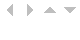

In [52]:
bs_html = BeautifulSoup(html)
print(bs_html.prettify())

Now lets get all the paragraph elements from the site.

Most webpage's are split into header and body - header is the bit that gets fed to the browser, body is the bit that gets fed to the human (via the eyeballs).
<br>Let's get the body bit first.

In [55]:
body=bs_html.find('body')

Use the 'find_all' method with the 'p' tags ('p' for paragraph, who said html was difficult?)

<i>You can use "find_all('a') to get all links, find_all('div') to get all the little sections

In [58]:
paragraphs=body.find_all('p')

Use the get_text method with a for-list-thing (nice and pythony)

In [66]:
[p.get_text() for p in paragraphs][40:-20]

['Locating Elements:',
 'driver.find_element_by_ – To find the first element matching the given locator argument. Returns a WebElement',
 'driver.find_elements_by_ – To find all elements matching the given locator argument. Returns a list of WebElement',
 'By ID',
 '<input id=”q” type=”text” />',
 'element = driver.find_element_by_id(“q”)',
 'By Name',
 '<input id=”q” name=”search” type=”text” />',
 'element = driver.find_element_by_name(“search”)',
 'By Class Name',
 '<div class=”username” style=”display: block;”>…</div>',
 'element = driver.find_element_by_class_name(“username”)',
 'By Tag Name',
 '<div class=”username” style=”display: block;”>…</div>',
 'element = driver.find_element_by_tag_name(“div”)',
 'By Link Text',
 '<a href=”#”>Refresh</a>',
 'element = driver.find_element_by_link_text(“Refresh”)',
 'By Partial Link Text',
 '<a href=”#”>Refresh Here</a>',
 'element = driver.find_element_by_partial_link_text(“Refresh”)',
 'By XPath',
 '<form id=”testform” action=”submit” metho

Now take some of the above code and go use it somewhere. Go on. I believe in you. Spread your automated wings like some sort of terrifying android bird from the future.<br><b>The possibilities are <i>endless</i>.

In [ ]:
def myVeryFirstAutomation(ideas):
    
    '''Oh look a terrifying void of empty space where my code should be.'''
    
    try:
        satisfaction=doing_something_with(ideas)
    '''It could be anything. You have the entire internet to choose from.'''
    except:
        coder+=coffee
        chill=lower_expectation_of_what_was_going_to_do_with(ideas)
        satisfaction=actually_do_something_with(ideas)
    
    return satisfaction

In case you need more references, here are Charles's wonderful demo videos again:<br>
[[Truth Seeker](https://youtu.be/OLS03wBXuy0)]<br>
[[Cookies](https://www.youtube.com/watch?v=DQozM40fDj0&feature=emb_title)]<br>
[[Captcha](https://youtu.be/Ht3iYWD_1fc)]<br>

In [ ]:
# Copy and paste different bits into here and execute them to see what they do
# StackOverflow is your friend here - look it up if you don't know how to do the thing you want to


my_url=''






### Can't think of anything? 
You could log into your Facebook automatically and get your computer to do all that mindless scrolling while <i>you</i> go enjoy the real world. 
<br>
![FaceBot](https://fossbytes.com/wp-content/uploads/2016/04/facebook-bot-engine.png)

## Facebot: It scrolls so you don't have to

In [72]:
AdamDriver.get('https://facebook.com')
accept_cookies = AdamDriver.find_element_by_xpath('//*[@id="u_0_h"]')
accept_cookies.click()

Don't do it too fast though or Zuckerberg will hack you to establish dominance.

In [81]:
email_box=AdamDriver.find_element_by_xpath('//*[@id="email"]')
pw_box=AdamDriver.find_element_by_xpath('//*[@id="pass"]')

#You can put your details in here if you want or try a different website or a fake account if you want to be sure
#there's nothing dodgy going on here. Hopefully this motivates you to actually modify the code.
my_email='redcurlz94xo@yahoo.com'
my_password='WhatK1nd0fFoolD0YouTakeMe4?'

time.sleep(3) 
print("Waiting: {} seconds.".format(3))
#Zucky is like a T-Rex; if you don't move, he can't see you

#FaceBot inputs your email so you don't have to
email_box.send_keys(my_email)

#This time sleep for a random number of seconds, just so Zucky's minions can't catch you either
random_wait_time=random.randint(2,5)
time.sleep(random_wait_time)
print("Waiting: {} seconds.".format(random_wait_time))

#FaceBot inputs your password so you don't have to
pw_box.send_keys(my_password)

#Let's make the random wait into a function, looks like we're gonna use it more than once
def random_wait(no_less_than, no_more_than):
    random_wait_time=random.uniform(no_less_than,no_more_than)
    time.sleep(random_wait_time)
    print("Waiting: {} seconds.".format(random_wait_time))
    
random_wait(3,7)


try:
    login_button= AdamDriver.find_element_by_xpath('''//*[@id="u_0_b"]''')
    login_button.click()
except:
    login_button= AdamDriver.find_element_by_xpath('''//*[@id="loginbutton"]''')
    login_button.click()

Waiting: 3 seconds.
Waiting: 5 seconds.
Waiting: 7 seconds.


In [85]:
def random_wait(no_less_than, no_more_than):
    random_wait_time=random.uniform(no_less_than,no_more_than)
    time.sleep(random_wait_time)
    print("Waiting: {} seconds.".format(random_wait_time))

Now if you've input your details you should be able to scroll endlessly

In [91]:
position=2000
while(True):
    AdamDriver.execute_script("window.scrollTo(0,{})".format(position))
    random_wait(1,3)
    position+=random.randint(1000,3000)
    print("Position on webpage: {}".format(position))

Waiting: 1.265244795636851 seconds.
4000
Waiting: 2.2327879425721004 seconds.
6000
Waiting: 2.6106016080130345 seconds.
8000
Waiting: 2.8807783215987506 seconds.
10000
Waiting: 1.9150409499019125 seconds.
12000
Waiting: 1.5194700141935018 seconds.
14000
Waiting: 2.9853071386015477 seconds.
16000
Waiting: 2.9379896573783686 seconds.
18000
Waiting: 2.360677091223808 seconds.
20000
Waiting: 2.3524251256563775 seconds.
22000
Waiting: 1.232332934591513 seconds.
24000
Waiting: 2.0075146130747608 seconds.
26000
Waiting: 2.459623853855261 seconds.
28000
Waiting: 1.959833595788605 seconds.
30000
Waiting: 1.7456601118297614 seconds.
32000
Waiting: 2.085089742000958 seconds.
34000
Waiting: 2.4991386701580094 seconds.
36000
Waiting: 2.897151402267591 seconds.
38000
Waiting: 1.6043602321055068 seconds.
40000
Waiting: 1.6599513162885826 seconds.
42000
Waiting: 1.446511981108603 seconds.
44000
Waiting: 1.3085217872968216 seconds.
46000
Waiting: 1.1567243231861701 seconds.
48000
Waiting: 2.44710523885

KeyboardInterrupt: 

Now go outside and play.
![Father Jack](https://media2.giphy.com/media/l7ZrjLJsznQuQ/giphy.gif?cid=ecf05e47tb5e3olns1z4t04sqwldsnfqtthf3i4yyj9cuaza&rid=giphy.gif)